### importing data and cleaning

Downloaded data from Plasma Proteome Database: http://www.plasmaproteomedatabase.org

goal is to find the most abundant plasma proteins


In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

PP_db = pd.read_excel('020215_concentration_PPdatabase.xls')
PP_db.head()


,PPD_ID,Gene Symbol,Gene ID,Protein concentration,Unit,Method,Sample type,Reference,Highest reported plasma protein level,Unit.1,Sample type.1
0,HPRD_00726,A1BG,1,50,ug/ml,Spectral counting,Plasma,21632744,22,mg/ml,Plasma
1,HPRD_00726,A1BG,1,39.77,ug/ml,Multiple reaction monitoring,Blood,23221968,39.77,ug/ml,Blood
2,HPRD_00726,A1BG,1,132.8,ug/ml,Multiple reaction monitoring,Plasma,23245390,NaN,NaN,NaN
3,HPRD_00726,A1BG,1,22,mg/ml,-,Plasma,20204147,NaN,NaN,NaN
4,HPRD_00726,A1BG,1,225,ug/ml,-,Plasma,15627965,NaN,NaN,NaN


Data needs cleaning.  Concentrations are in different units specified by unit column.

Also selecting for the following: MRM b/c that is the most accurate method of finding concentrations, Plasma etc

Converting concentrations to numbers

In [2]:
PP_db = PP_db.loc[PP_db['Method'] == 'Multiple reaction monitoring']  #selecting by method
PP_db = PP_db.loc[PP_db['Sample type'] == 'Plasma'] #selecting by sample type
PP_db['Protein concentration'] = PP_db['Protein concentration'].convert_objects(convert_numeric=True) #converting conc to numbers
PP_db.head()

,PPD_ID,Gene Symbol,Gene ID,Protein concentration,Unit,Method,Sample type,Reference,Highest reported plasma protein level,Unit.1,Sample type.1
2,HPRD_00726,A1BG,1,132.800,ug/ml,Multiple reaction monitoring,Plasma,23245390,NaN,NaN,NaN
8,HPRD_00072,A2M,2,1.609,mg/ml,Multiple reaction monitoring,Plasma,23592487,1.609,mg/ml,Plasma
57,HPRD_00073,AFM,173,35.000,ug/ml,Multiple reaction monitoring,Plasma,23245390,320,ug/ml,Plasma
72,HPRD_00106,AGT,183,10.540,ug/ml,Multiple reaction monitoring,Plasma,22577024,60.63,ug/ml,Blood
73,HPRD_00106,AGT,183,47.600,ug/ml,Multiple reaction monitoring,Plasma,23245390,NaN,NaN,NaN


Now making a column of concentrations all in one unit and then ordering by concentration

Then writing data to an excel file

In [3]:
#making a column with concentrations all in one unit: ug/ml
conc_dict = {'pg/ml':1e-6, 'ng/ml':1e-3, 'ug/ml':1.0, 'mg/ml':1.0e3}
PP_db['Protein concentration ug/ml'] = [conc_dict[PP_db.iloc[i,4]]*PP_db.iloc[i,3] for i in range(PP_db.shape[0])]

#ordering by concentration

PP_db.set_index(['Gene Symbol'],inplace=True)  #sets gene symbol as the index
PP_db = PP_db.groupby(PP_db.index).first()
PP_db = PP_db.sort(['Protein concentration ug/ml'], ascending = False)
PP_db.head()

#writing to excel file
writer = pd.ExcelWriter('20160417_plasma_MRM_orderedbyconc.xlsx')
PP_db.to_excel(writer,'Sheet1')
writer.save()


Plotting

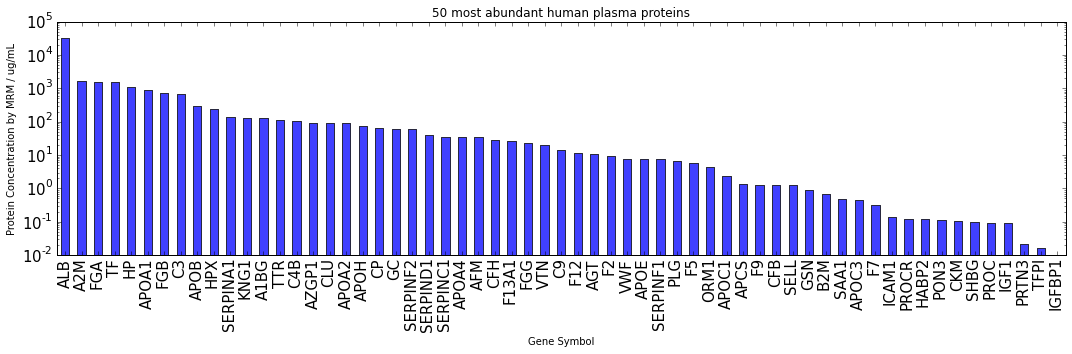

In [4]:
plt.figure(figsize=(15,5))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 
plt.title('50 most abundant human plasma proteins')
PP_db['Protein concentration ug/ml'].iloc[0:].plot(kind='bar',alpha=0.75).set_yscale('log')
plt.ylabel('Protein Concentration by MRM / ug/mL')
plt.tight_layout()
plt.savefig('Mostabundant_plasma_proteins.png')